# Setup

In [1]:
import os
import tarfile
import urllib
import numpy as np


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
import matplotlib as mpl

mpl.rcParams.update({'font.size': 45})
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

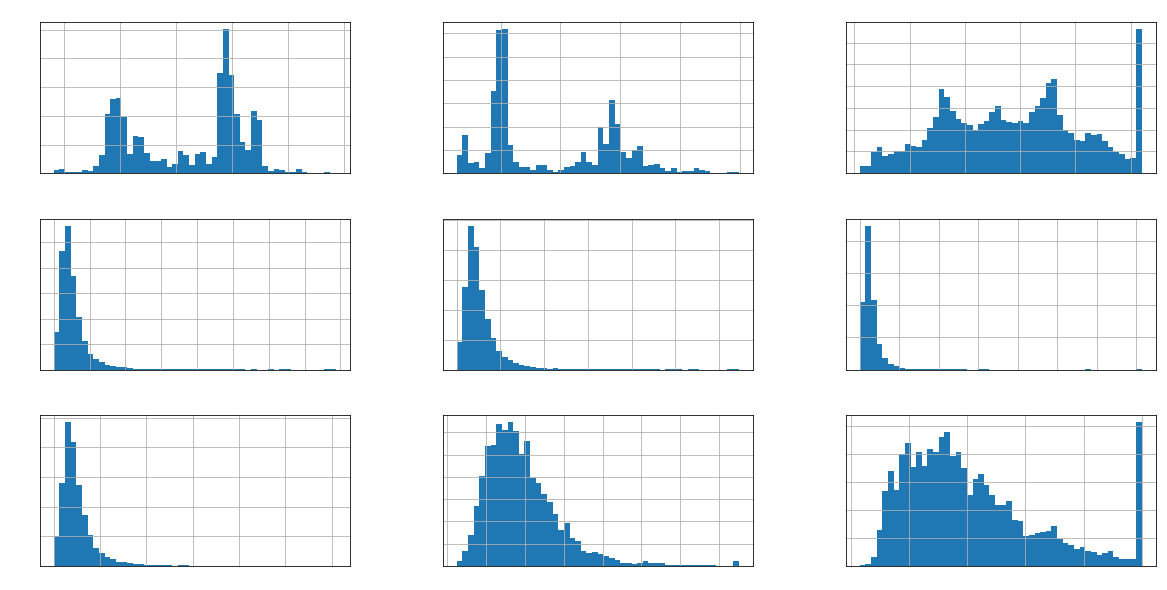

In [20]:
%matplotlib inline   
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,10))
#plt.rcParams.update({'font.size': 25})
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [26]:
#np.percentile(housing['median_income'],np.arange(0,100,10))

np.percentile(housing['median_income'],np.arange(90,100,2))

array([6.15921 , 6.500576, 6.940296, 7.7197  , 8.94675 ])

In [57]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.,15.2],
                               labels=[1, 2, 3, 4, 5])


In [58]:
print(np.inf)

inf


<AxesSubplot:>

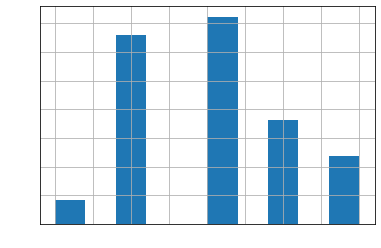

In [59]:
housing['income_cat'].hist()

In [60]:
housing[housing['income_cat'].isnull() == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [61]:
#housing['median_income'].max()
housing['income_cat'].isnull().sum()

0

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [66]:
print(len(strat_train_set))
len(strat_test_set)

16512


4128

In [67]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4


In [68]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [69]:
strat_train_set["income_cat"].value_counts()/ len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [70]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [71]:
housing = strat_train_set.copy()


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

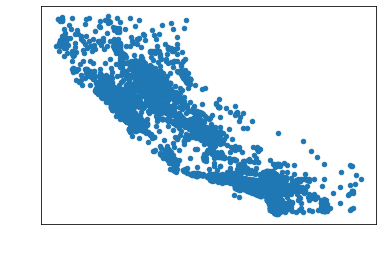

In [72]:
housing.plot(x='longitude',y='latitude',kind='scatter')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

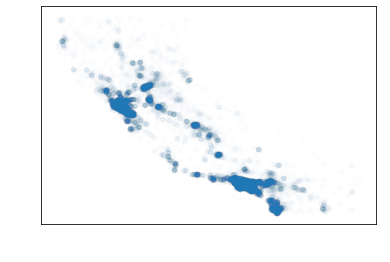

In [73]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.01)


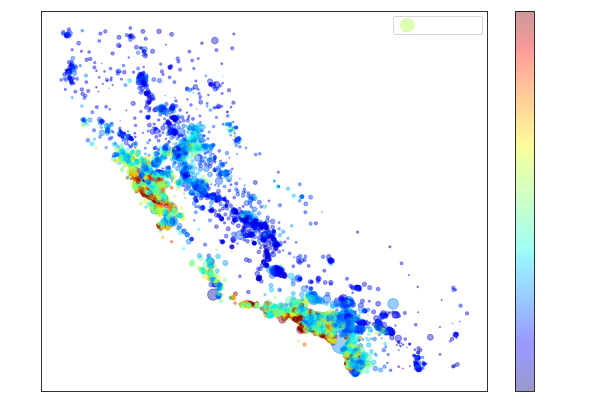

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [75]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

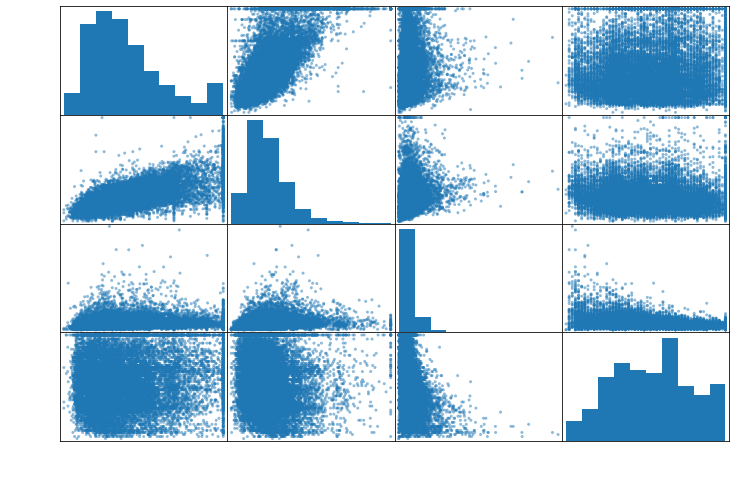

In [76]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [77]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [78]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [79]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [81]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [82]:
housing_num = housing.drop("ocean_proximity", axis=1)


In [83]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [84]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [85]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [86]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [87]:
housing_cat = housing[["ocean_proximity"]]


In [88]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [91]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)


In [92]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [93]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [94]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [95]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [96]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [98]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68015.60403709 65789.79373435 71212.32652837 70671.4665643
 70757.54309234 75199.01330377 70816.71831405 71566.11170409
 75490.85740879 71355.27762872]
Mean: 71087.47123158605
Standard deviation: 2728.8819757998126


In [99]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983443


In [100]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49576.7705499  47971.34569756 49653.25971328 52444.52452518
 49850.90129162 53581.20435285 49069.53497991 48110.64150941
 52983.93518255 50040.12397994]
Mean: 50328.22417822121
Standard deviation: 1884.180302517529


In [63]:
71502.92193158121+2296.3279528556186,71502.92193158121-2296.3279528556186

(73799.24988443682, 69206.59397872559)

In [64]:
69104.07998247063+2880.328209818065,69104.07998247063-2880.328209818065

(71984.4081922887, 66223.75177265257)

In [65]:
50182.303100336096+2097.0810550985693,50182.303100336096-2097.0810550985693

(52279.384155434665, 48085.222045237526)

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64797.477825099995 {'max_features': 2, 'n_estimators': 3}
54897.90860110208 {'max_features': 2, 'n_estimators': 10}
52538.555612220924 {'max_features': 2, 'n_estimators': 30}
60259.12084673914 {'max_features': 4, 'n_estimators': 3}
52898.195453443994 {'max_features': 4, 'n_estimators': 10}
50653.922645808765 {'max_features': 4, 'n_estimators': 30}
59976.98379146462 {'max_features': 6, 'n_estimators': 3}
51698.227184713316 {'max_features': 6, 'n_estimators': 10}
50112.555784007876 {'max_features': 6, 'n_estimators': 30}
59699.39195899674 {'max_features': 8, 'n_estimators': 3}
52127.287188524846 {'max_features': 8, 'n_estimators': 10}
50205.75847598238 {'max_features': 8, 'n_estimators': 30}
62419.94194780813 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54558.68455297126 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58779.50881265587 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52257.22368392537 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.10119963e-02, 6.88628673e-02, 4.29491602e-02, 1.82797207e-02,
       1.62650562e-02, 1.80356230e-02, 1.53929754e-02, 3.14590096e-01,
       6.72685306e-02, 1.08150756e-01, 7.55836410e-02, 1.23804811e-02,
       1.44649421e-01, 7.09976174e-05, 8.56119602e-03, 7.94748174e-03])

In [ ]:
#array([ 0,  7,  9, 10, 12])

In [71]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3145900959999083, 'median_income'),
 (0.14464942123937438, 'INLAND'),
 (0.10815075568622758, 'pop_per_hhold'),
 (0.0810119962524695, 'longitude'),
 (0.07558364104590494, 'bedrooms_per_room'),
 (0.06886286729530768, 'latitude'),
 (0.06726853056557038, 'rooms_per_hhold'),
 (0.04294916018561411, 'housing_median_age'),
 (0.018279720690493797, 'total_rooms'),
 (0.018035622958131898, 'population'),
 (0.01626505620042355, 'total_bedrooms'),
 (0.015392975352065569, 'households'),
 (0.012380481146611543, '<1H OCEAN'),
 (0.008561196021630978, 'NEAR BAY'),
 (0.00794748174291508, 'NEAR OCEAN'),
 (7.0997617350745e-05, 'ISLAND')]

In [72]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   

In [73]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([45965.28358722, 49914.22935576])

In [103]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [104]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

# Excercise 2

### Excercise 2.1

In [74]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'kernel':['linear'],'C':[10.,30.,100.,300.,1000.,3000.,10000.,30000.0]},
    {'kernel':['rbf'],'C':[1.0,3.0,10.,30.,100.,300.,1000.,],
    'gamma':[0.01,0.03,0.1,0.3,1.,3.,]}
  ]
svm_regr=SVR()

grid_search=GridSearchCV(svm_regr,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

grid_search.fit(housing_prepared,housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.0s
[CV] END .............................C=100.0, kernel=linear; total time=   6.0s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [75]:
grid_search

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [76]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.6183460516

In [77]:
grid_search.best_params_


{'C': 30000.0, 'kernel': 'linear'}

### exercise 3.2

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.8s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d3da4d9c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d3da4fb80>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256623

In [80]:
rnd_search.best_params_


{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

### exercise 3.3

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [83]:
k = 5

In [105]:
feature_importances

NameError: name 'feature_importances' is not defined

In [84]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [85]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [86]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3145900959999083, 'median_income'),
 (0.14464942123937438, 'INLAND'),
 (0.10815075568622758, 'pop_per_hhold'),
 (0.0810119962524695, 'longitude'),
 (0.07558364104590494, 'bedrooms_per_room')]

In [87]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [88]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [89]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

In [90]:
housing_prepared[0:4, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ],
       [ 1.22173797, -0.86592882, -0.10680295,  0.96120521,  0.        ]])

### Exercise-4 
#### Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [91]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [92]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [93]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 82915.77062052 288057.72329294  95680.82648363 149790.34263836]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


### Exercise-5
#### Question: Automatically explore some preparation options using `GridSearchCV`.


In [94]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.7s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   7.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   9.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   9.1s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.9s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.4s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.5s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.4s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.5s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.7s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.2s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   8.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   9.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.1s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   8.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.6s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.6s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   9.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.5s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  10.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.4s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  11.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.2s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.9s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  16.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.7s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  14.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  14.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.5s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  14.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  14.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=10.3min


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  16.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  14.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  16.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.1s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  16.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  16.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  16.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.2s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  13.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  16.1s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  15.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  17.6s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  21.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  17.3s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  13.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  18.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  18.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  17.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  15.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  14.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  18.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.8s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  24.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  19.0s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  17.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  15.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  19.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  16.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  15.3s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  18.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  16.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  16.9s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=  15.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=  16.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=  15.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=  16.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=  16.6s


/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=  13.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=  17.4s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=  15.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=  16.4s
[CV] END feature_selection__k=15, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=15, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=15, preparation__num__imputer__strategy=mean; total time=  16.1s
[CV] END feature_selection__k=15, preparation__num__imputer__strategy=mean; total time=  15.5s
[CV] END feature_selection__k=15, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] 

/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/saivinil_pratap/miniconda3/envs/mle-dev/lib/python3.10/site-packag

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       